In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report


# Dataset Description
Human cell records and classify cells to the samples are mild(bengin) state of evil(maligant) state

In [5]:
cell_df = pd.read_csv("cell_samples.csv")
cell_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
malignant_df = cell_df[cell_df['Class']==4][:200]#mild state
benign_df = cell_df[cell_df['Class']==2][:200]#evil state

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

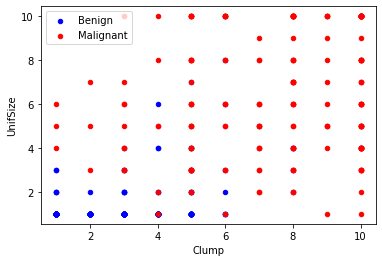

In [7]:
axes = benign_df.plot(kind="scatter",x="Clump",y="UnifSize",color="blue",label="Benign")
malignant_df.plot(kind="scatter",x="Clump",y="UnifSize",color="red",label="Malignant",ax=axes)

In [8]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Converting all data into integer

In [9]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

/tmp/ipykernel_25512/569705709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Removing unwanted columns and distribute in to data and target 

In [10]:
cell_df.columns
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
y = np.asarray(cell_df['Class'])

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [38]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)

In [39]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



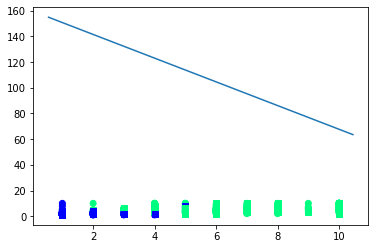

In [43]:
plt.scatter(X_train[:,2],X_train[:,4],c=y_train,cmap='winter')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.scatter(X_test[:,2],X_test[:,4],c=y_test,cmap='winter',marker='s')

w = classifier.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(xlim[0],xlim[1])
# yy = np.linspace(ylim[1],ylim[0])
yy = a * xx - (classifier.intercept_[0] / w[1])
plt.plot(xx,yy)